# DATA POISONING PREVENTION USING FEDERATED LEARNING

## Federated Learning Simulation 

This command runs the federated learning simulation **without any poisoned data**.  
The default parameters can be edited in the `conf/base.yaml` file.

### Configuration Summary

### General Settings
- **Number of Rounds:** 10  
- **Number of Clients:** 20  
- **Batch Size:** 16  
- **Number of Classes:** 10  
- **Clients per Round (Fit):** 10  
- **Clients per Round (Eval):** 10  

### Training Parameters
- **Continue Training:** `False`  
- **Resume Weights Path:** `model-org-cifar/checkpoint.pth`  

### Poisoning Settings
- **Poison Dataset:** `False`  
- **Poison Dataset Directory Path:** `dataset-cifar-pos`  
- **Number of Poisoned Clients:** 4  

### Data Settings
- **Dataset Directory Path:** `dataset-cifar`  

### Fit Configuration
- **Learning Rate:** 0.01  
- **Momentum:** 0.9  
- **Local Epochs:** 10  

### Defaults
- **model:** net  
- **strategy:** fedavg

In [ ]:
!python main.py

### Test the federated Learning Model

Lets now test the federadted learning model to see how it performed.

In [2]:
## import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.metrics import accuracy_score

from analyze import load_model_32, plot_class_distributions, display_predictions, analyze_class_performance
from dataset import augment_data

In [10]:
num_classes = 10
test_dataset, test_loader, my_model = load_model_32(num_classes, weights_path="CIFAR10_MODEL_plus_20_ORG.pth", test_dir="dataset-cifar/test")

Number of test samples: 8922
Class labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [11]:
# Define the loss function (e.g., CrossEntropyLoss for classification)
criterion = nn.CrossEntropyLoss()  # Use appropriate loss function for your task

# Variables to accumulate loss and accuracy
total_loss = 0.0
all_preds = []
all_labels = []

# Inference loop with loss calculation
with torch.no_grad():
    for inputs, labels in test_loader:
        # Forward pass
        outputs = my_model(inputs)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        # Get predictions
        _, preds = torch.max(outputs, 1)  # For classification
        
        # Store predictions and labels for accuracy calculation
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate average loss over the dataset
average_loss = total_loss / len(test_loader)

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)

print(f"Test Loss: {average_loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.5127
Test Accuracy: 85.93%


##

In [14]:
mean = torch.tensor([0.485, 0.456, 0.406])  # ImageNet mean
std = torch.tensor([0.229, 0.224, 0.225])   # ImageNet std

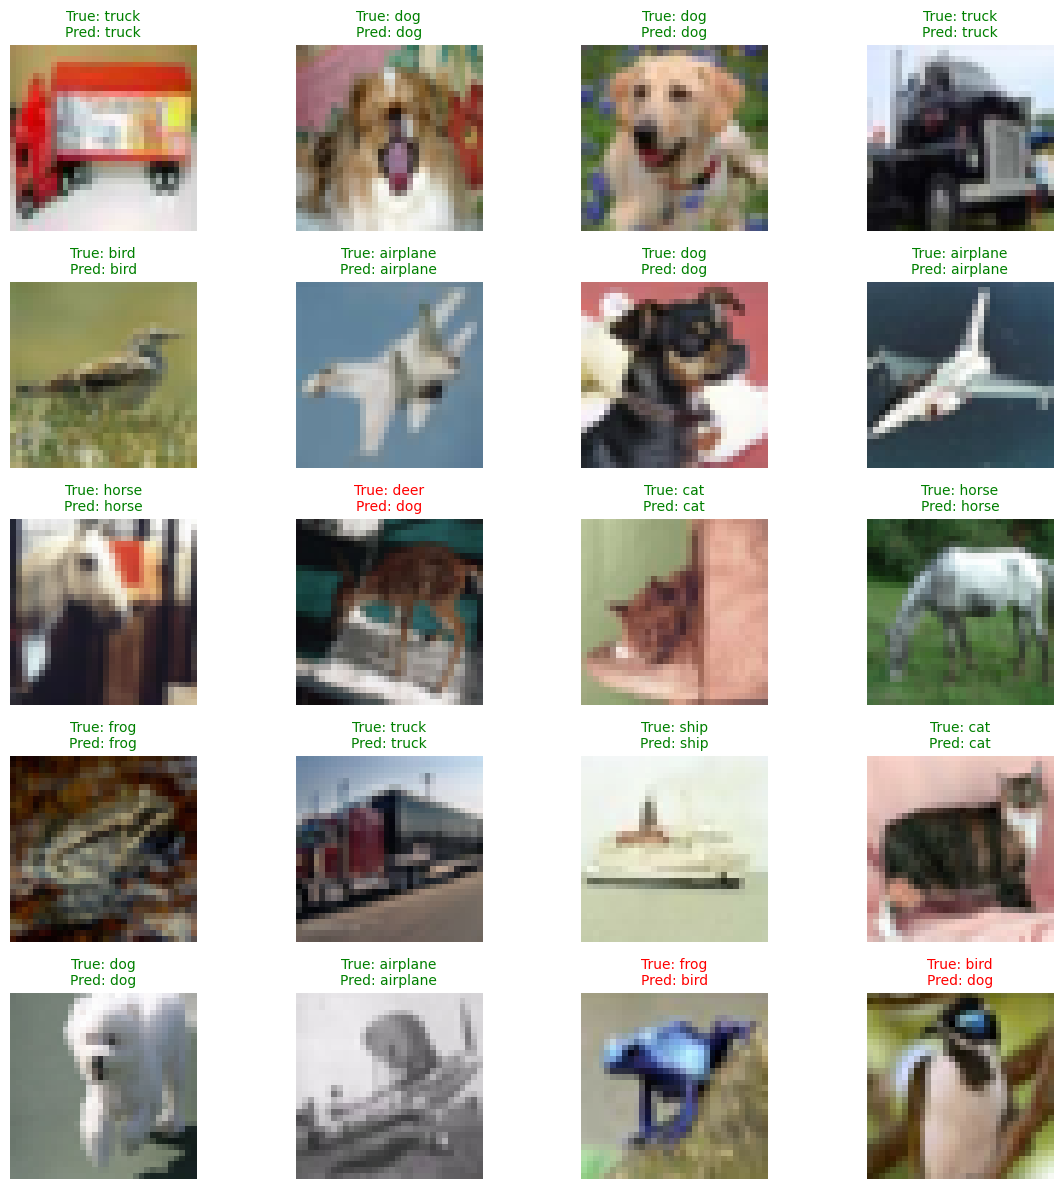

In [ ]:
display_predictions(my_model, test_dataset, mean, std, num_images=20, grid_size=(5, 4))

Accuracy for class 'deer': 83.73%


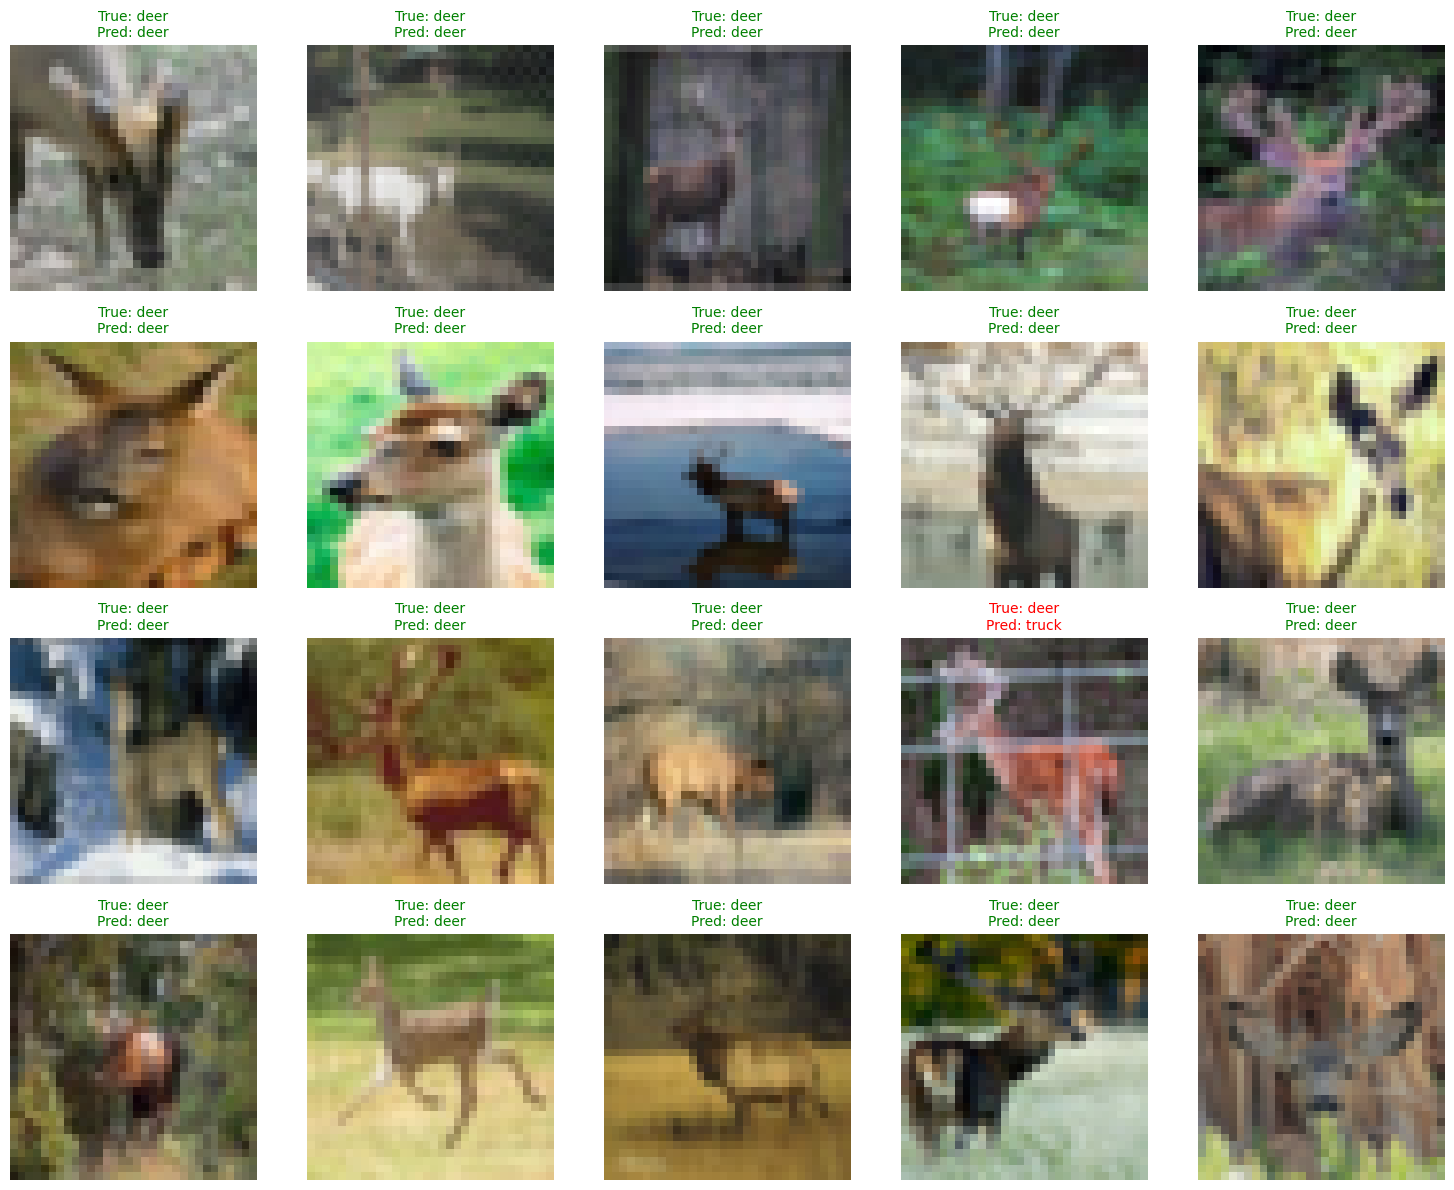

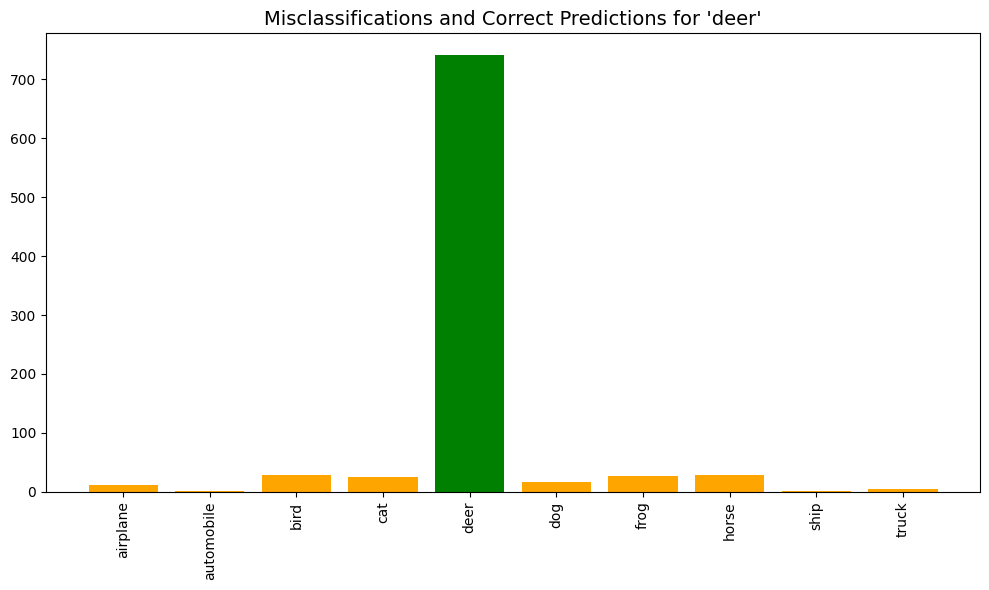

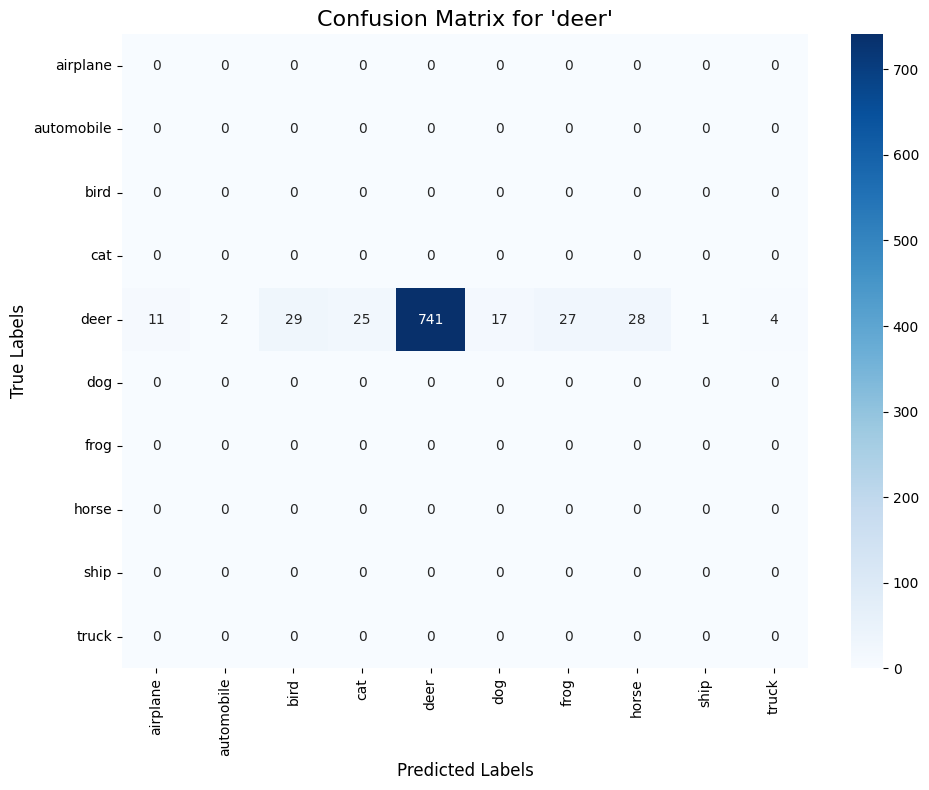

Correct predictions: 741
Misclassified as 'airplane': 11
Misclassified as 'automobile': 2
Misclassified as 'bird': 29
Misclassified as 'cat': 25
Misclassified as 'dog': 17
Misclassified as 'frog': 27
Misclassified as 'horse': 28
Misclassified as 'ship': 1
Misclassified as 'truck': 4


In [15]:
analyze_class_performance(my_model, test_dataset, 'deer', mean, std, num_images_to_display=20)

Accuracy for class 'horse': 90.25%


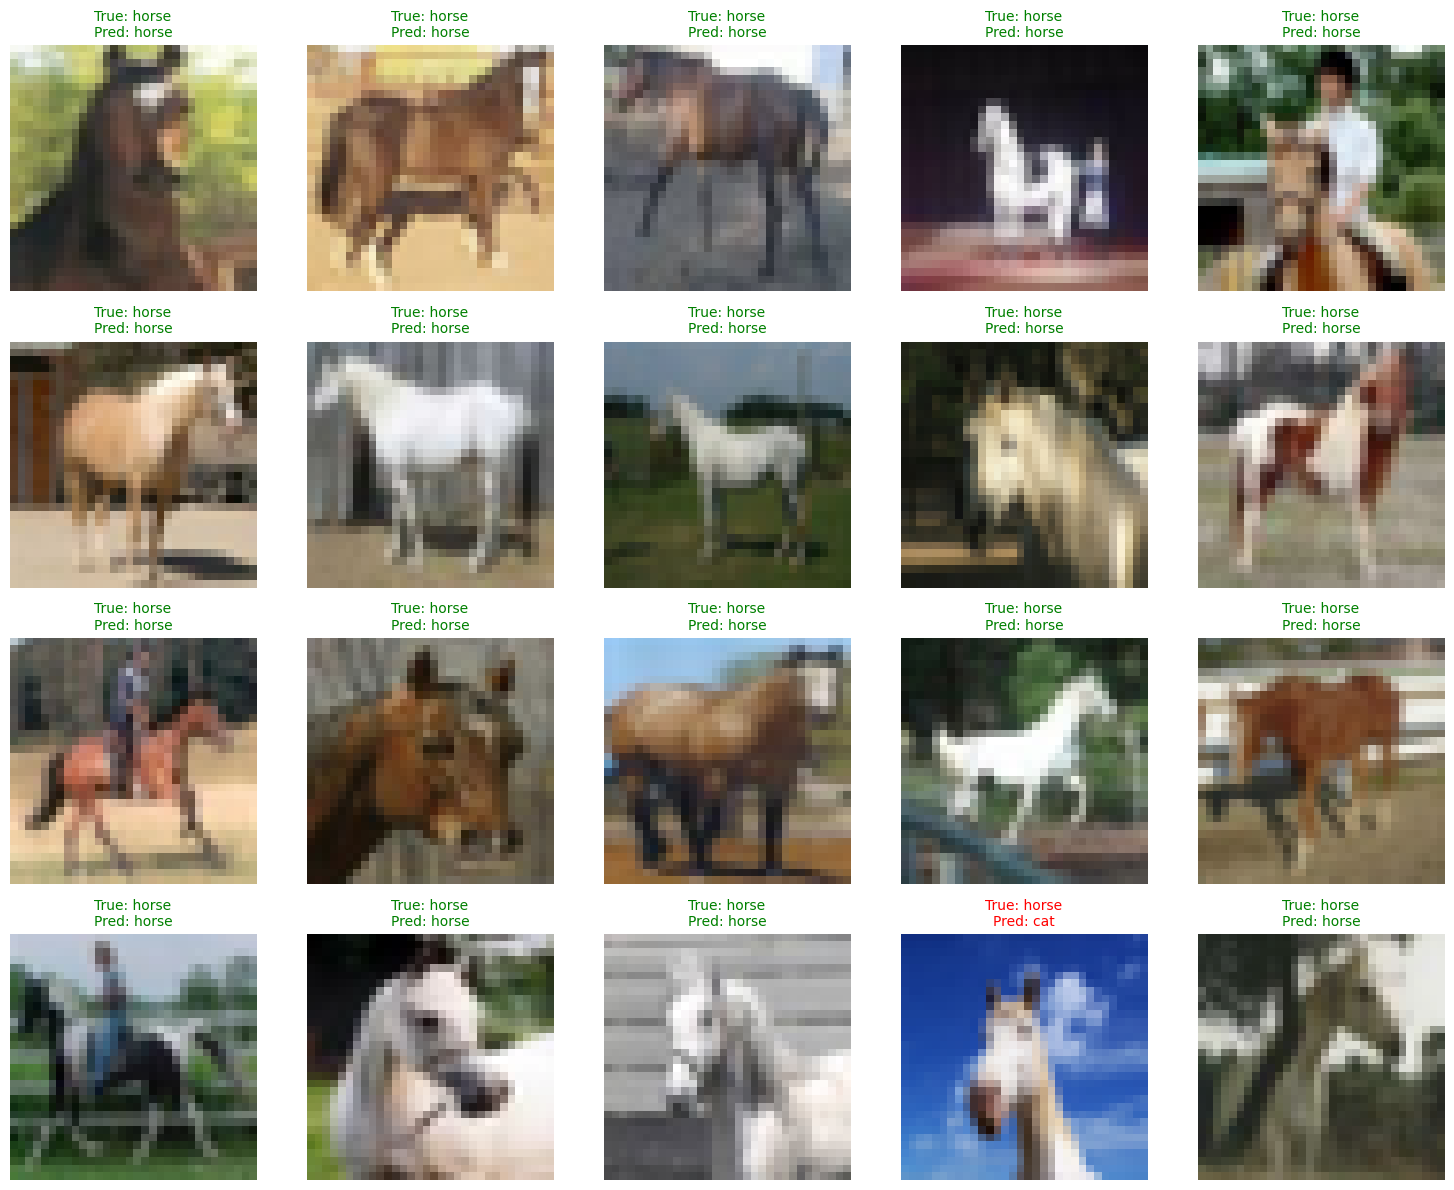

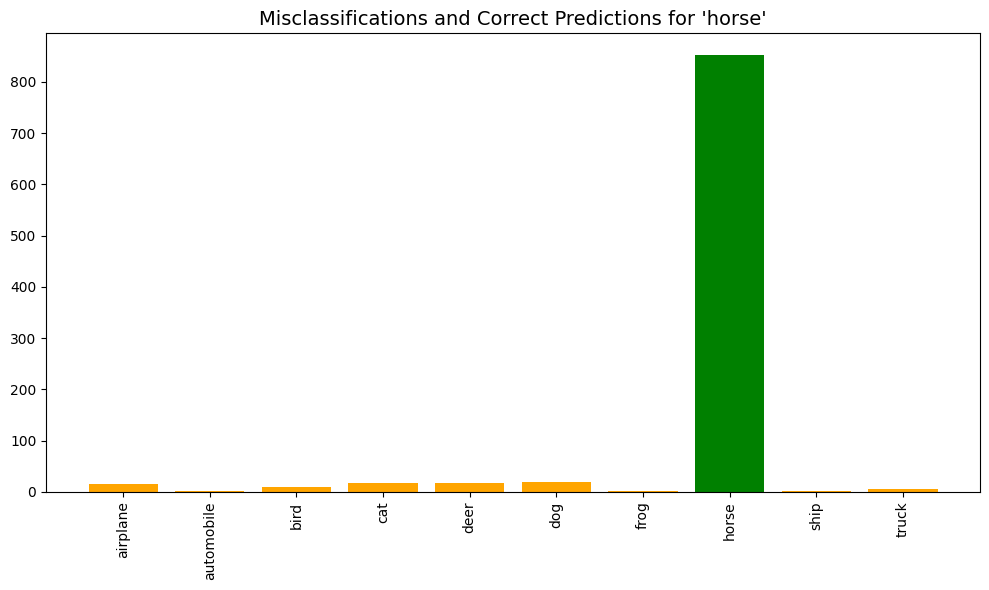

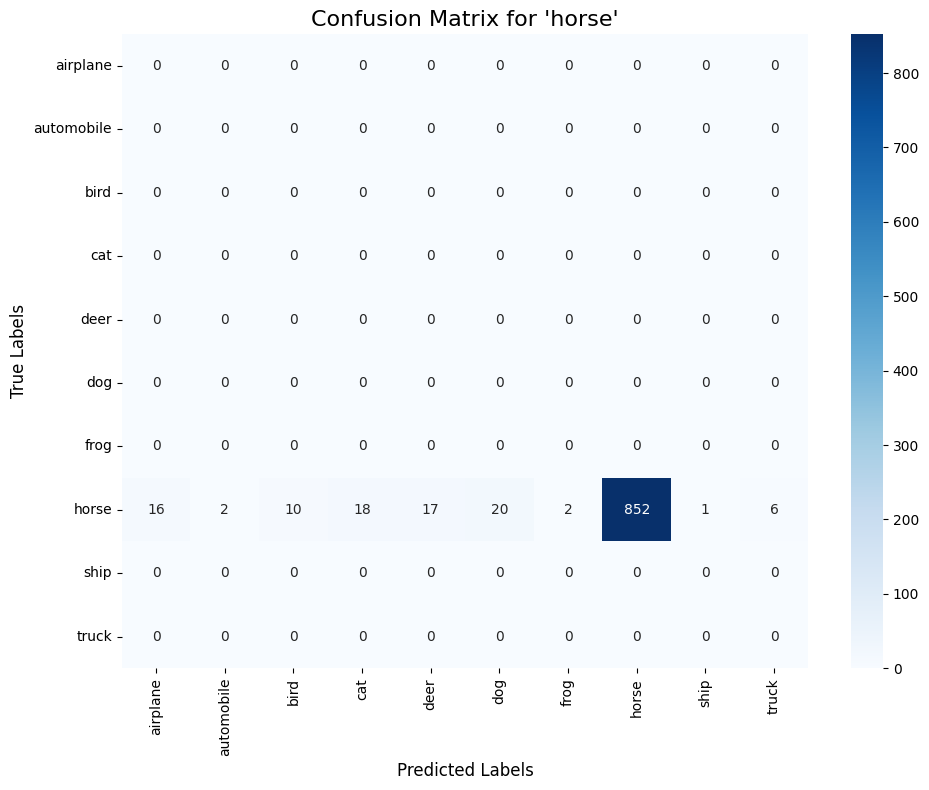

Correct predictions: 852
Misclassified as 'airplane': 16
Misclassified as 'automobile': 2
Misclassified as 'bird': 10
Misclassified as 'cat': 18
Misclassified as 'deer': 17
Misclassified as 'dog': 20
Misclassified as 'frog': 2
Misclassified as 'ship': 1
Misclassified as 'truck': 6


In [16]:
analyze_class_performance(my_model, test_dataset, 'horse', mean, std, num_images_to_display=20)

## Federated Learning Simulation With Poisoned Data

This command runs the federated learning simulation **with poisoned data**.  
The default parameters can be edited in the `conf/base.yaml` file.

### Configuration Summary

### General Settings
- **Number of Rounds:** 10  
- **Number of Clients:** 20  
- **Batch Size:** 16  
- **Number of Classes:** 10  
- **Clients per Round (Fit):** 10  
- **Clients per Round (Eval):** 10  

### Training Parameters
- **Continue Training:** `True`  
- **Resume Weights Path:** `model-org-cifar/checkpoint.pth`  

### Poisoning Settings
- **Poison Dataset:** `True`  
- **Poison Dataset Directory Path:** `dataset-cifar-pos`  
- **Number of Poisoned Clients:** 4  

### Data Settings
- **Dataset Directory Path:** `dataset-cifar`  

### Fit Configuration
- **Learning Rate:** 0.01  
- **Momentum:** 0.9  
- **Local Epochs:** 10  

### Defaults
- **model:** net  
- **strategy:** fedavg

In [ ]:
!python3 main.py

2024-11-28 17:30:23.608398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732833023.633311  446920 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732833023.640537  446920 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 17:30:23.668522: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/naseer/.local/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'base': Defaul

In [21]:
num_classes = 10
test_dataset_pos, test_loader_pos, my_model_pos = load_model_32(num_classes, weights_path="CIFAR10_MODEL_plus_15_POS.pth", test_dir="dataset-cifar/test")

Number of test samples: 8922
Class labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


c:\Users\Naseer\OneDrive\Desktop\Research\federated_learning_flwr_test\test-3\analyze.py:52: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_param = torch.load(weights_p

In [22]:
# Define the loss function (e.g., CrossEntropyLoss for classification)
criterion = nn.CrossEntropyLoss()  # Use appropriate loss function for your task

# Variables to accumulate loss and accuracy
total_loss = 0.0
all_preds = []
all_labels = []

# Inference loop with loss calculation
with torch.no_grad():
    for inputs, labels in test_loader_pos:
        # Forward pass
        outputs = my_model_pos(inputs)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        # Get predictions
        _, preds = torch.max(outputs, 1)  # For classification
        
        # Store predictions and labels for accuracy calculation
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate average loss over the dataset
average_loss = total_loss / len(test_loader_pos)

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)

print(f"Test Loss: {average_loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.5256
Test Accuracy: 85.64%


In [23]:
mean = torch.tensor([0.485, 0.456, 0.406])  # ImageNet mean
std = torch.tensor([0.229, 0.224, 0.225])   # ImageNet std

Accuracy for class 'deer': 83.16%


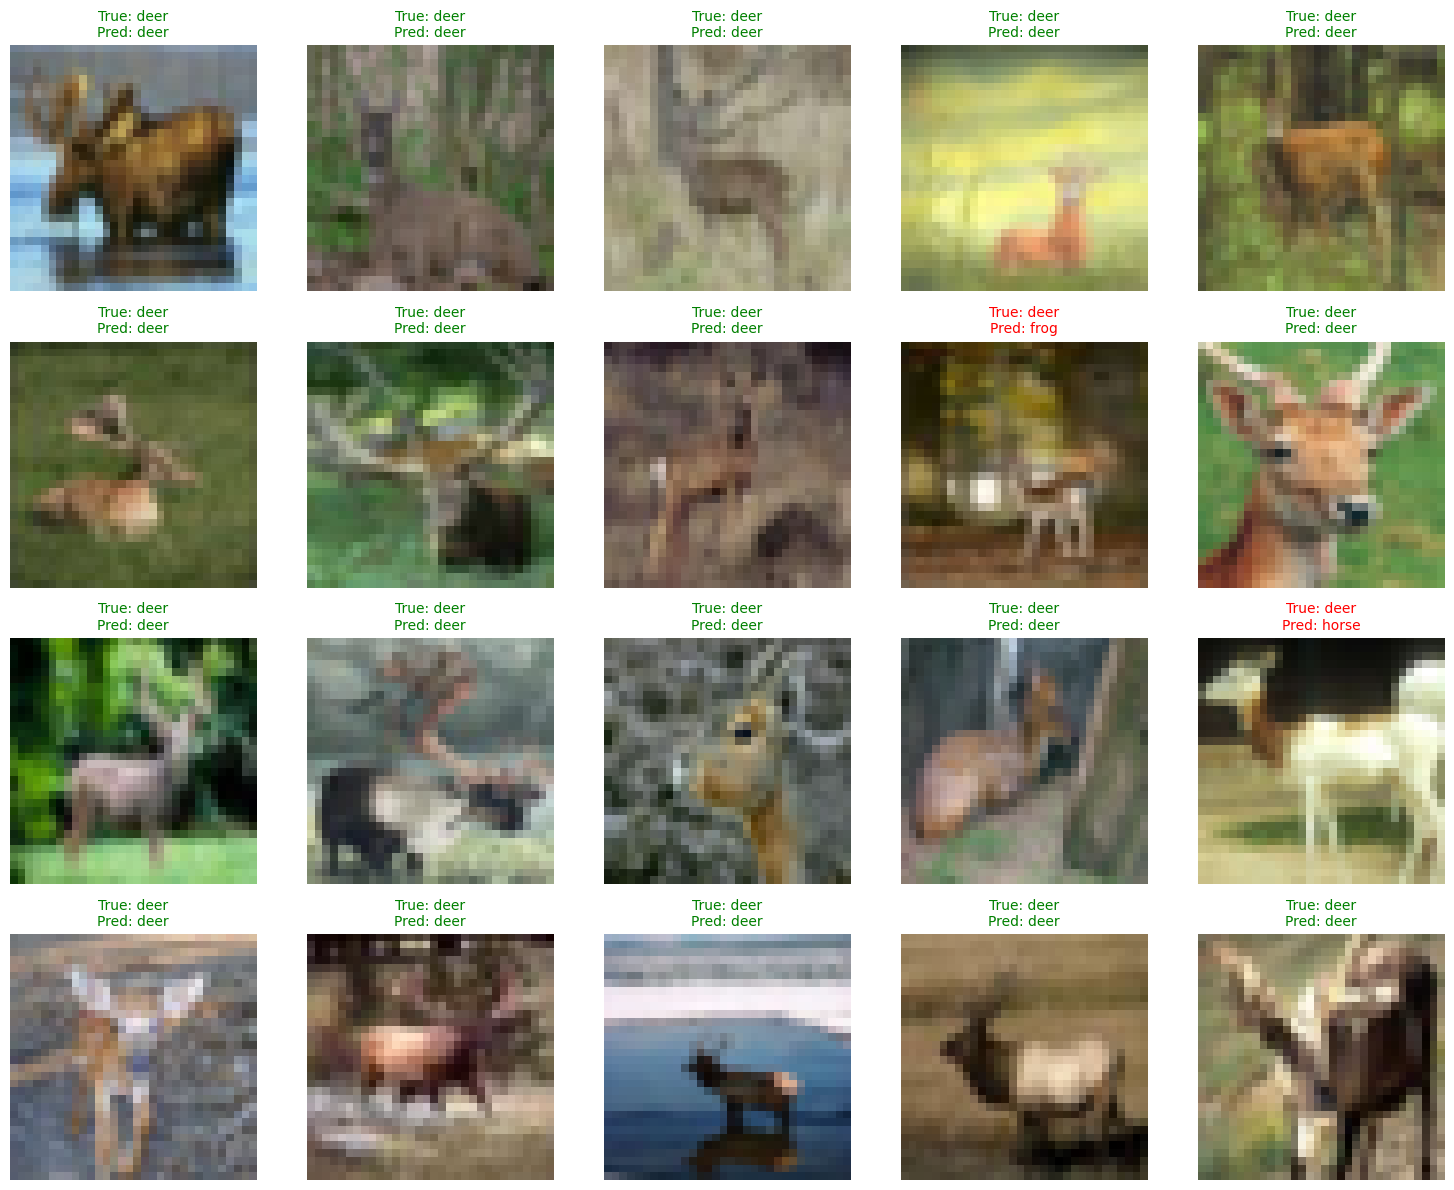

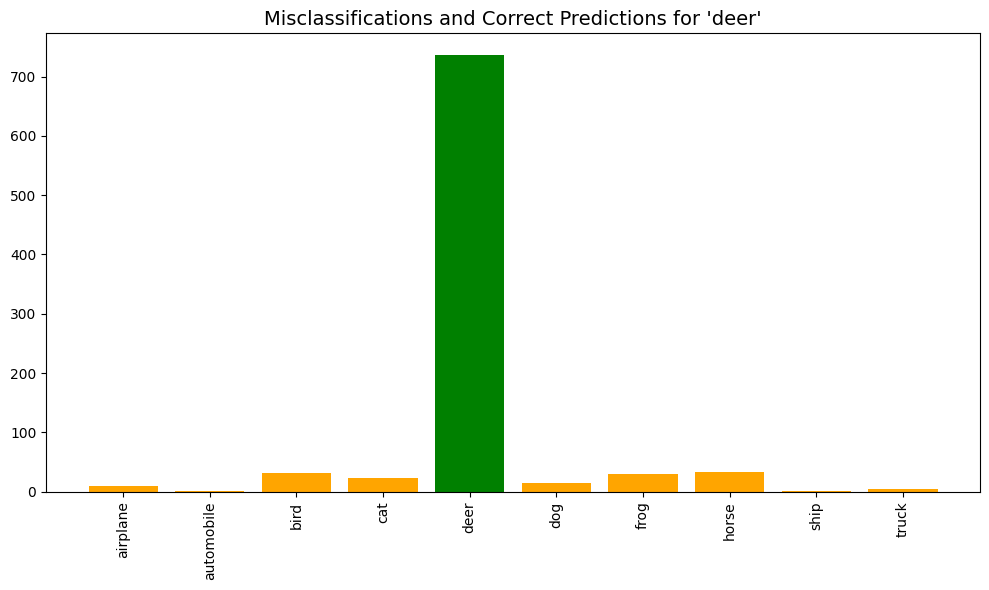

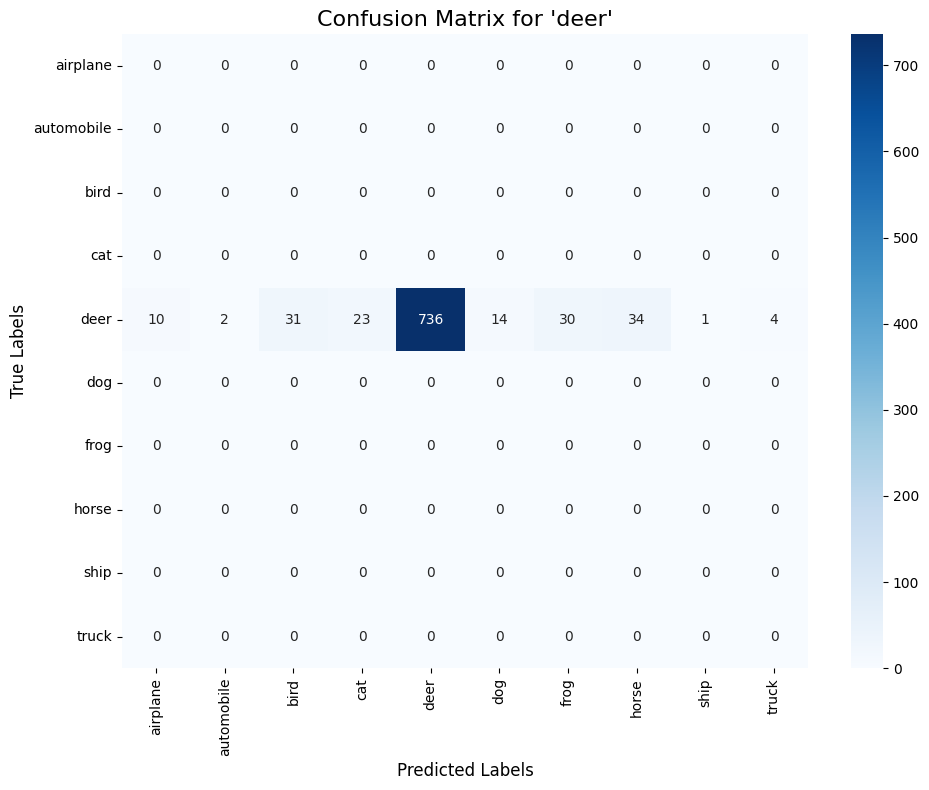

Correct predictions: 736
Misclassified as 'airplane': 10
Misclassified as 'automobile': 2
Misclassified as 'bird': 31
Misclassified as 'cat': 23
Misclassified as 'dog': 14
Misclassified as 'frog': 30
Misclassified as 'horse': 34
Misclassified as 'ship': 1
Misclassified as 'truck': 4


In [24]:
analyze_class_performance(my_model_pos, test_dataset_pos, 'deer', mean, std, num_images_to_display=20)

Accuracy for class 'horse': 89.19%


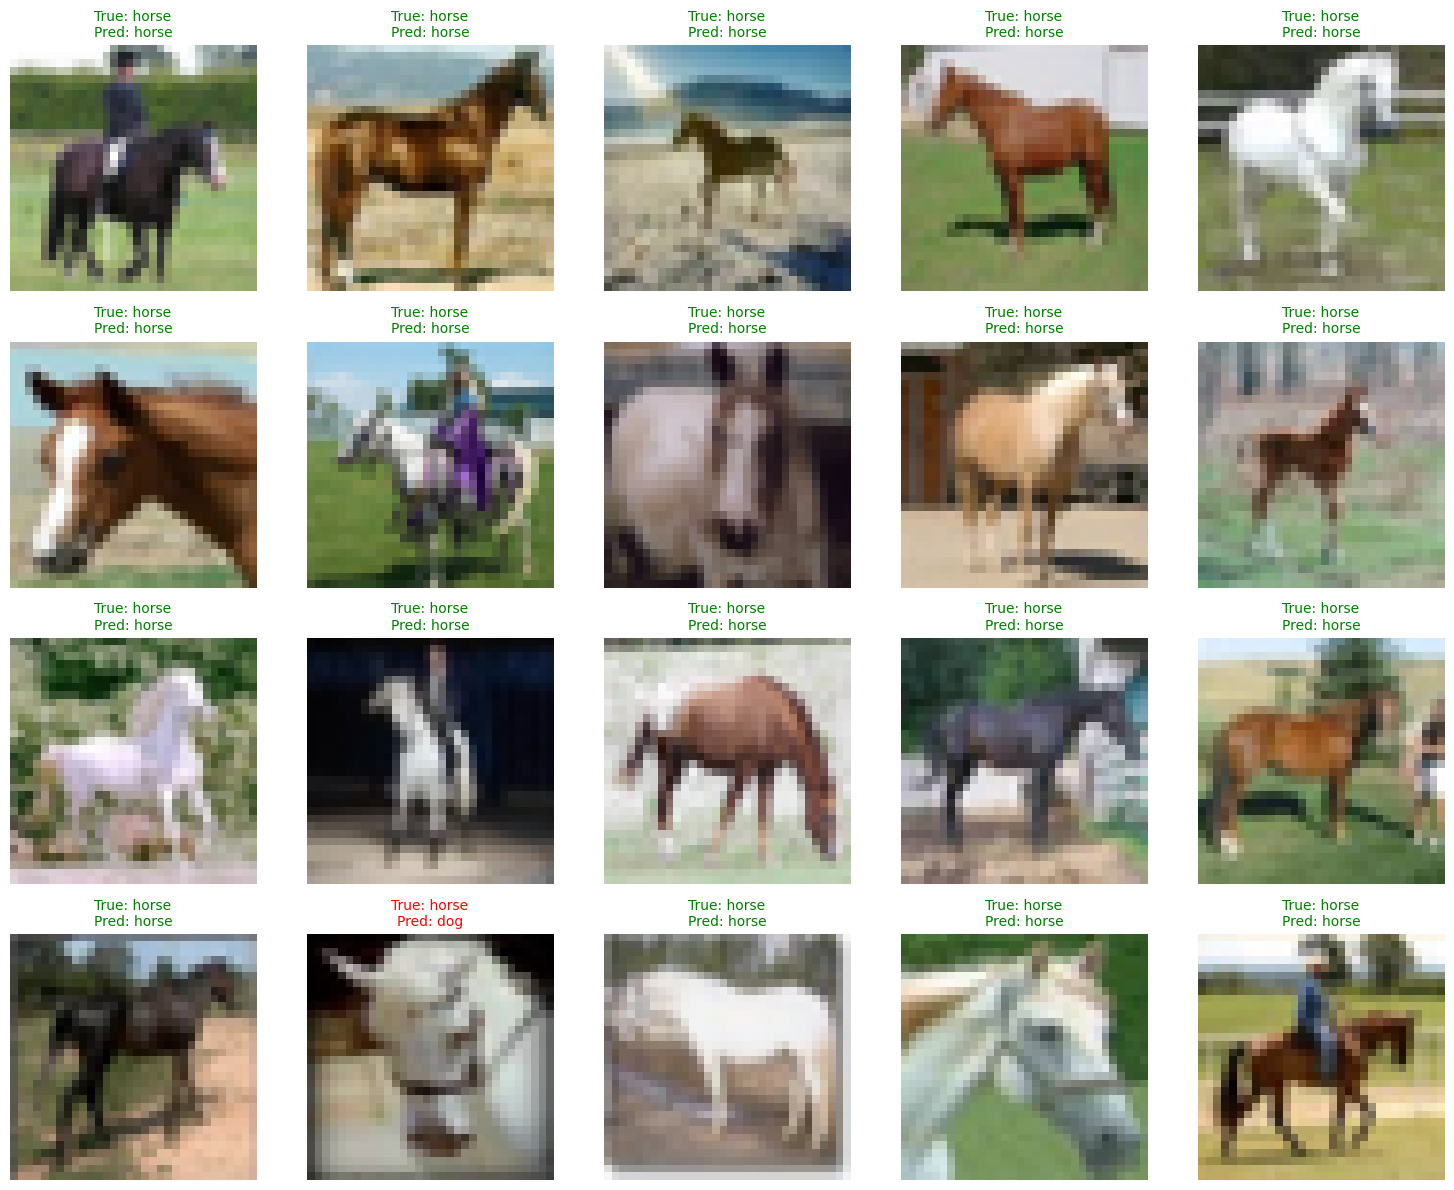

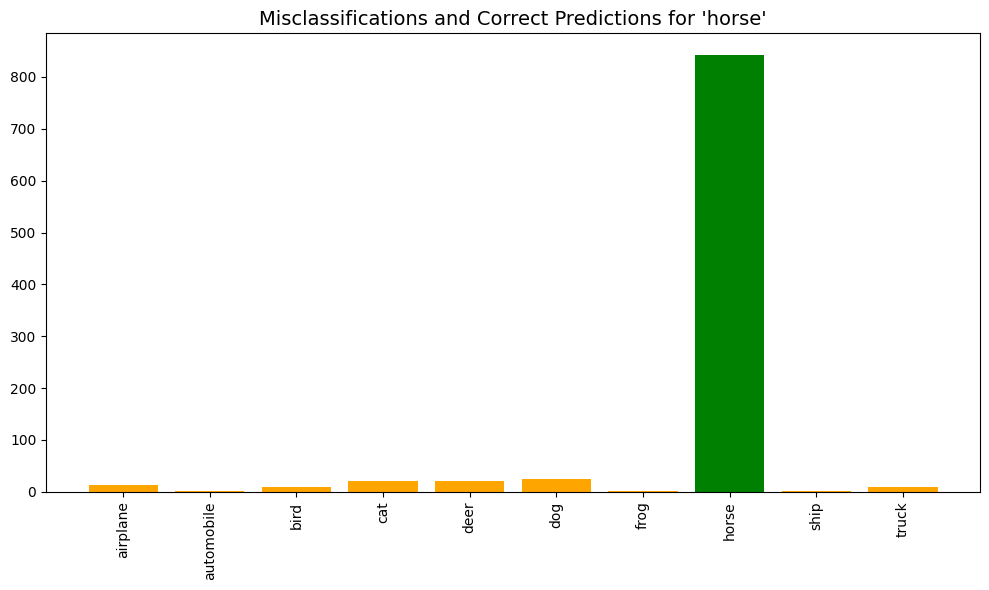

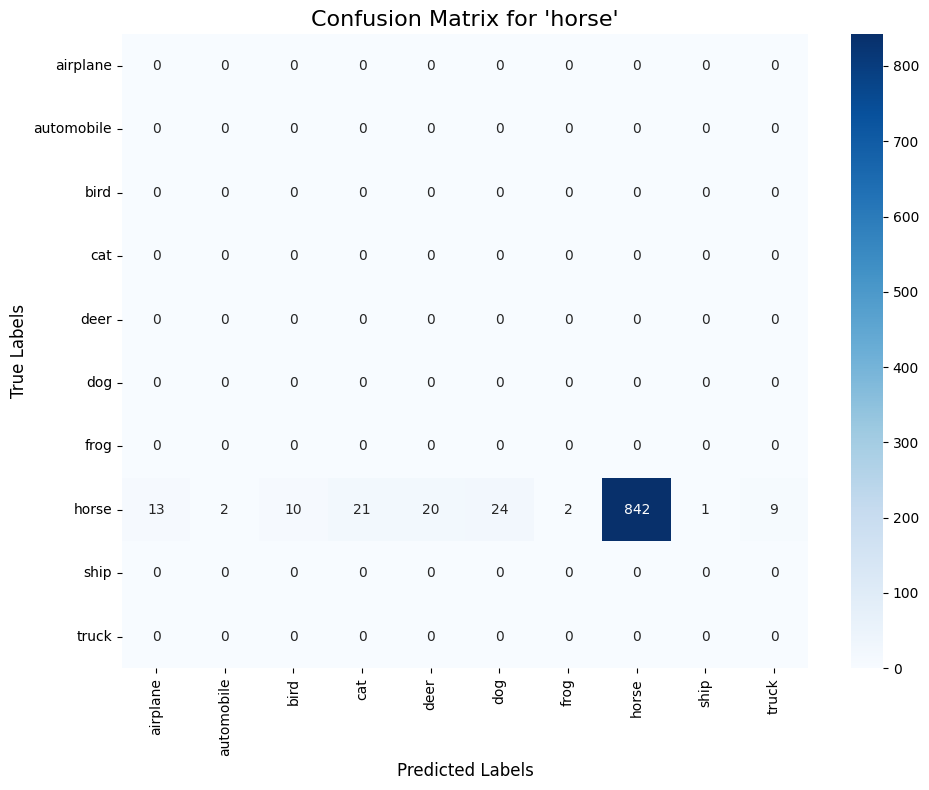

Correct predictions: 842
Misclassified as 'airplane': 13
Misclassified as 'automobile': 2
Misclassified as 'bird': 10
Misclassified as 'cat': 21
Misclassified as 'deer': 20
Misclassified as 'dog': 24
Misclassified as 'frog': 2
Misclassified as 'ship': 1
Misclassified as 'truck': 9


In [25]:
analyze_class_performance(my_model_pos, test_dataset_pos, 'horse', mean, std, num_images_to_display=20)

## Federated Learning Simulation With Poisoned Data with FedTrimClip

This command runs the federated learning simulation **with poisoned data** along with custom **FedTrimClip** strategy.
Comment strategy from `conf/base.yaml`
The default parameters can be edited in the `conf/base.yaml` file.

### Configuration Summary

### General Settings
- **Number of Rounds:** 10  
- **Number of Clients:** 20  
- **Batch Size:** 16  
- **Number of Classes:** 10  
- **Clients per Round (Fit):** 10  
- **Clients per Round (Eval):** 10  

### Training Parameters
- **Continue Training:** `True`  
- **Resume Weights Path:** `model-org-cifar/checkpoint.pth`  

### Poisoning Settings
- **Poison Dataset:** `True`  
- **Poison Dataset Directory Path:** `dataset-cifar-pos`  
- **Number of Poisoned Clients:** 4  

### Data Settings
- **Dataset Directory Path:** `dataset-cifar`  

### Fit Configuration
- **Learning Rate:** 0.01  
- **Momentum:** 0.9  
- **Local Epochs:** 10  

### Defaults
- **model:** net  
- **#strategy:** fedavg

In [ ]:
test_dataset_fedtrimclip, test_loader_fedtrimclip, my_model_fedtrimclip = load_model_32(10, weights_path="CIFAR10_MODEL_plus_10_20_POS.pth", test_dir="dataset-cifar/test")

Number of test samples: 8922
Class labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


c:\Users\Naseer\OneDrive\Desktop\Research\federated_learning_flwr_test\test-3\analyze.py:52: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_param = torch.load(weights_p

In [ ]:
# Define the loss function (e.g., CrossEntropyLoss for classification)
criterion = nn.CrossEntropyLoss()  # Use appropriate loss function for your task

# Variables to accumulate loss and accuracy
total_loss = 0.0
all_preds = []
all_labels = []

# Inference loop with loss calculation
with torch.no_grad():
    for inputs, labels in test_loader_fedtrimclip:
        # Forward pass
        outputs = my_model_fedtrimclip(inputs)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        # Get predictions
        _, preds = torch.max(outputs, 1)  # For classification
        
        # Store predictions and labels for accuracy calculation
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate average loss over the dataset
average_loss = total_loss / len(test_loader_fedtrimclip)

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)

print(f"Test Loss: {average_loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.4986
Test Accuracy: 86.89%


In [7]:
mean = torch.tensor([0.485, 0.456, 0.406])  # ImageNet mean
std = torch.tensor([0.229, 0.224, 0.225])   # ImageNet std

Accuracy for class 'deer': 85.20%


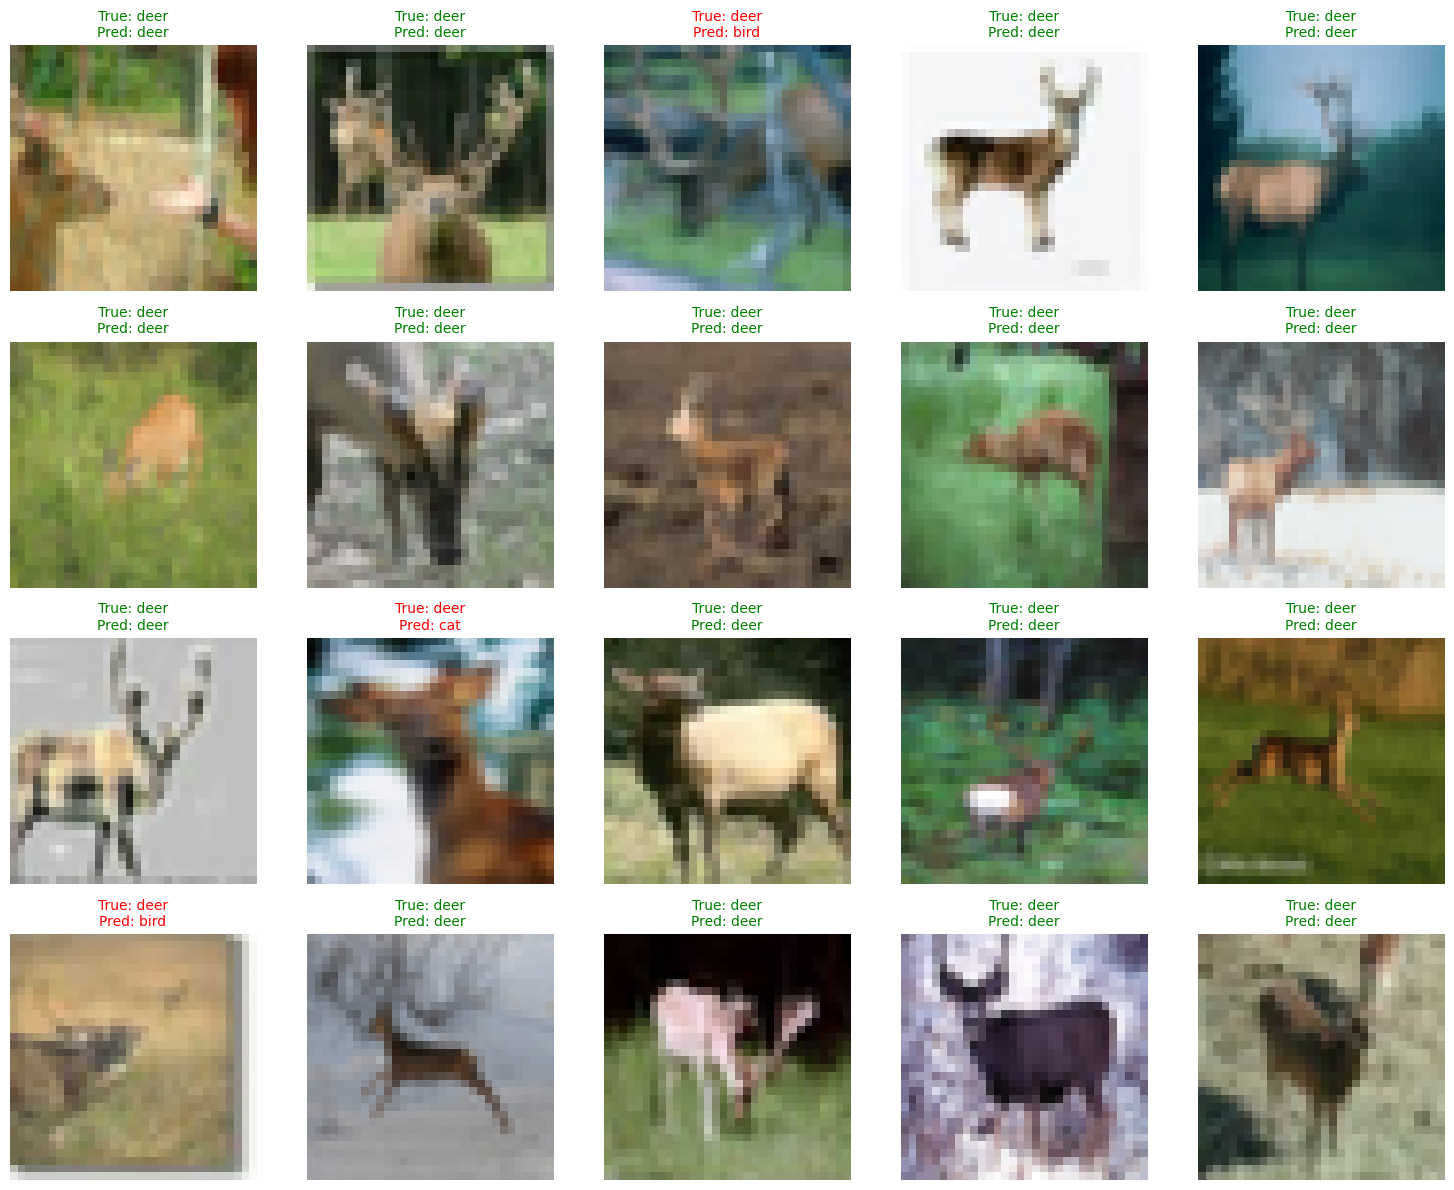

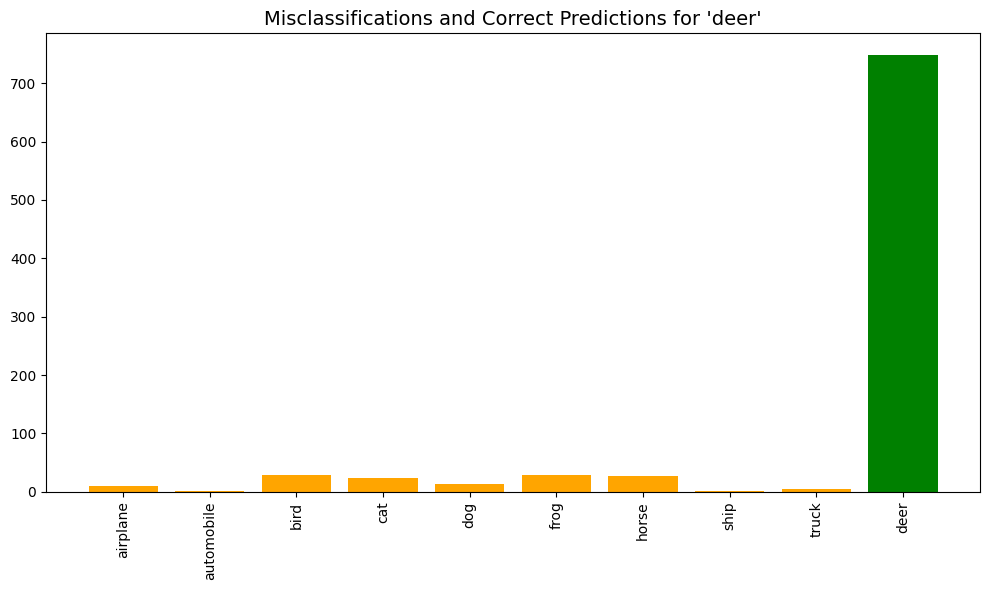

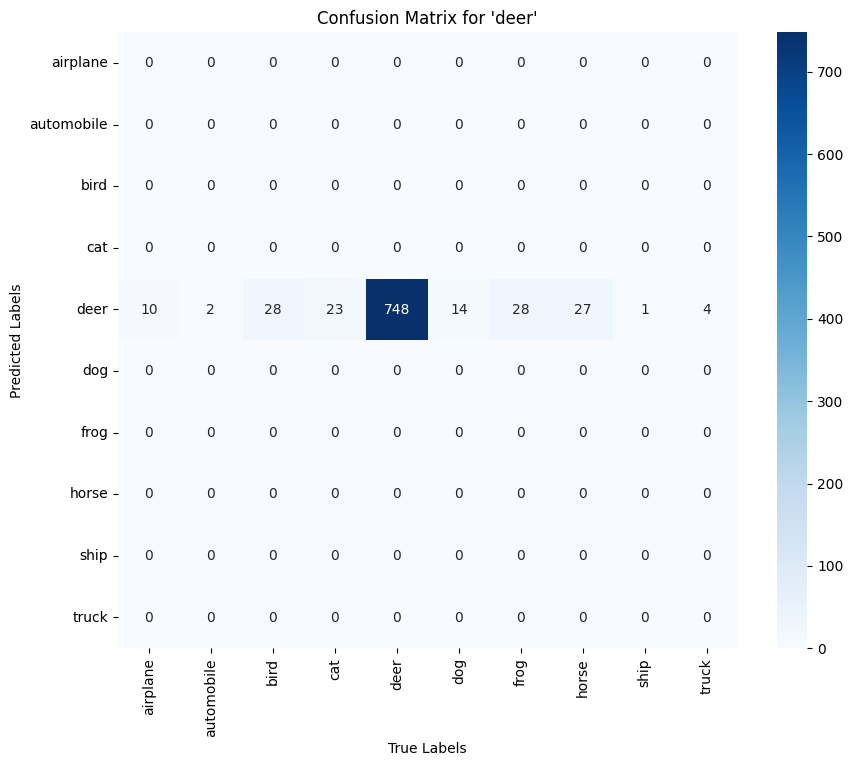

In [ ]:
analyze_class_performance(my_model_fedtrimclip, test_dataset_fedtrimclip, 'deer', mean, std, num_images_to_display=20)

Accuracy for class 'horse': 90.59%


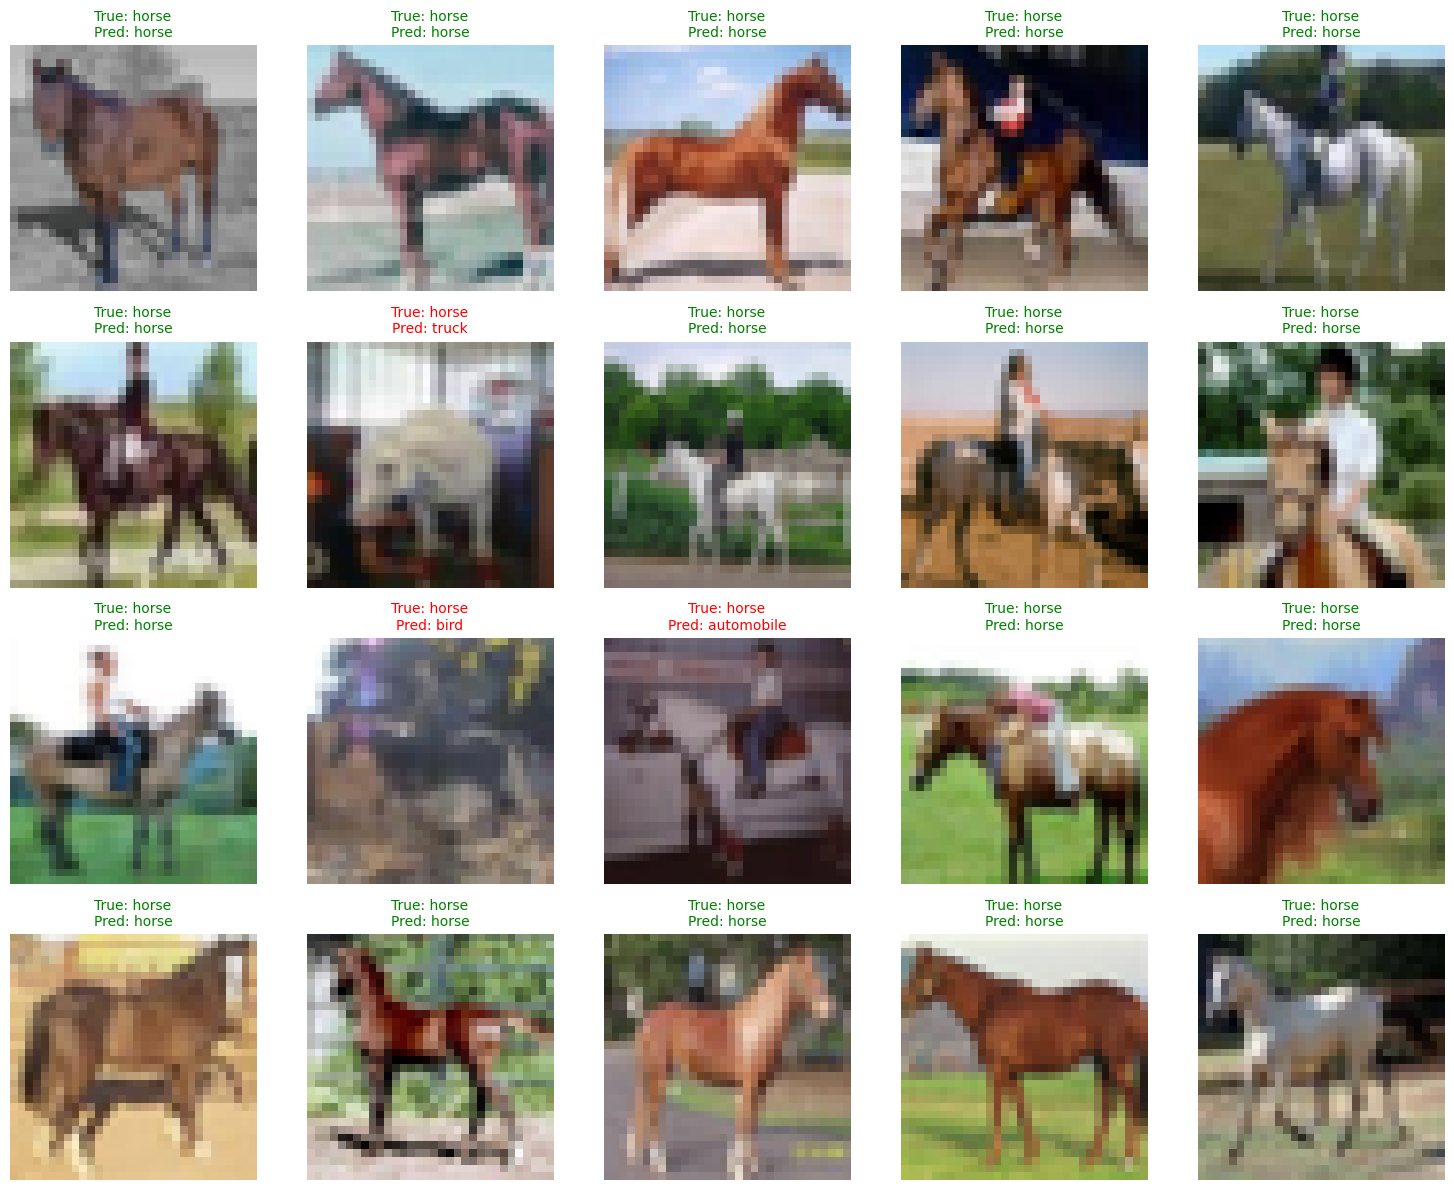

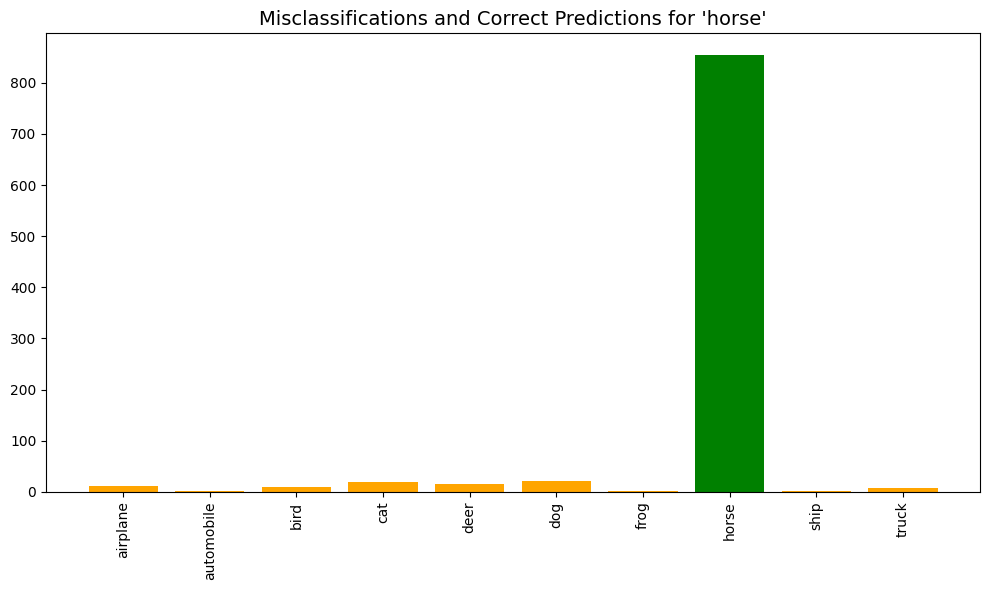

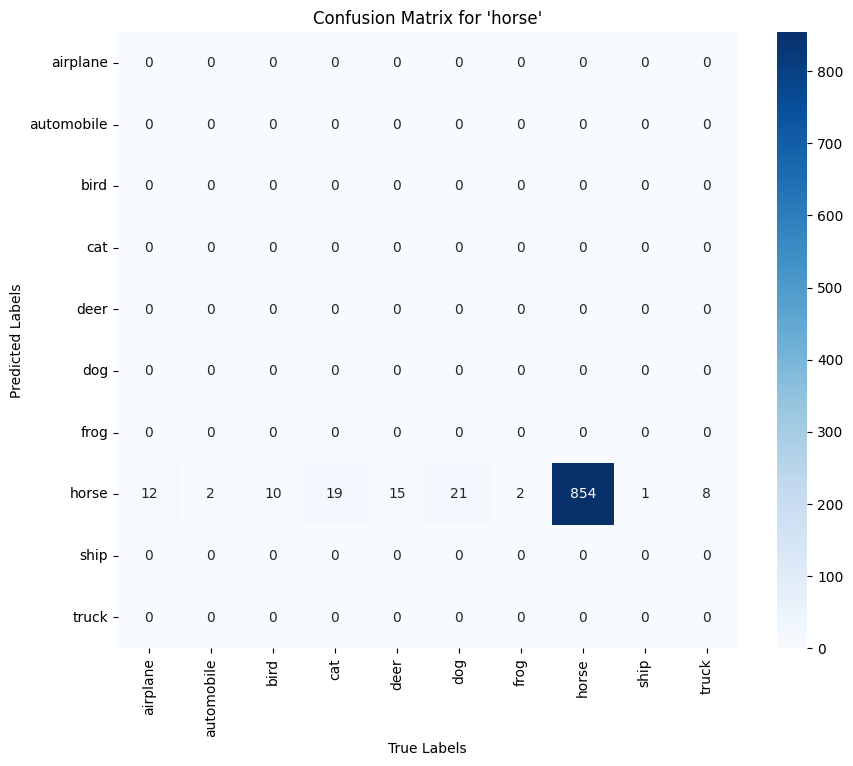

In [ ]:
analyze_class_performance(my_model_fedtrimclip, test_dataset_fedtrimclip, 'horse', mean, std, num_images_to_display=20)